In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pd.read_csv("embeddings.csv", header=None) 

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-0.171809,-0.283547,-0.225269,-0.194234,-0.251806,-0.015930,0.361903,-0.040298,0.285784,-0.125654,...,0.138150,-0.141220,-0.028884,-0.006982,0.001374,0.278950,0.004608,-0.369544,-0.086527,-0.078493
1,-0.310932,-0.135495,0.111102,-0.205998,-0.121733,0.153475,0.090985,0.243659,-0.035681,0.057823,...,0.009027,-0.046489,-0.271074,-0.140325,0.063643,-0.128416,0.070272,0.028213,-0.125272,-0.068574
2,-0.144844,0.054115,0.248662,0.106999,0.185634,-0.192204,-0.058184,0.086721,0.050865,0.177452,...,-0.069063,-0.094062,-0.231831,0.361882,0.007789,-0.040662,0.118558,-0.092229,-0.218155,-0.306153
3,-0.049283,-0.069961,0.037253,-0.064952,0.284652,-0.156979,-0.005968,-0.031128,0.069949,0.153000,...,0.055952,-0.002168,-0.150571,0.313309,0.228282,-0.052132,0.057727,-0.062202,-0.199910,-0.307055
4,0.086691,-0.287331,-0.057749,-0.126598,0.229553,-0.173466,-0.002014,-0.009945,0.180420,0.105024,...,0.140870,-0.078067,0.025883,0.180472,-0.109271,-0.130807,0.010570,-0.067602,-0.010340,0.002677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,-0.344568,-0.145930,0.166770,-0.311876,-0.120023,0.204993,0.062406,0.490530,-0.074486,-0.114467,...,0.017778,0.002827,-0.362279,-0.106212,0.171621,-0.238015,0.204682,0.070971,-0.229273,-0.019492
355,-0.079137,-0.056951,-0.069007,-0.101536,0.079317,-0.086015,0.129620,-0.068375,0.066057,0.002233,...,-0.033250,-0.014748,-0.073009,0.127277,-0.007885,-0.176418,0.087099,0.029420,0.052579,0.054836
356,-0.039615,-0.276671,-0.258091,-0.231103,-0.081588,0.140545,0.378629,-0.189877,0.325682,-0.052738,...,0.153582,-0.200027,-0.053565,0.093906,0.002354,0.185903,-0.108900,-0.288083,-0.019739,0.048366
357,-0.228283,-0.144960,0.038325,-0.203080,-0.000900,0.144627,0.010484,0.315258,0.002872,0.004318,...,0.017204,-0.014069,-0.299036,-0.072514,0.137255,-0.155951,0.158088,0.038005,-0.128090,-0.044348


In [5]:
Z = linkage(df, method='ward')  

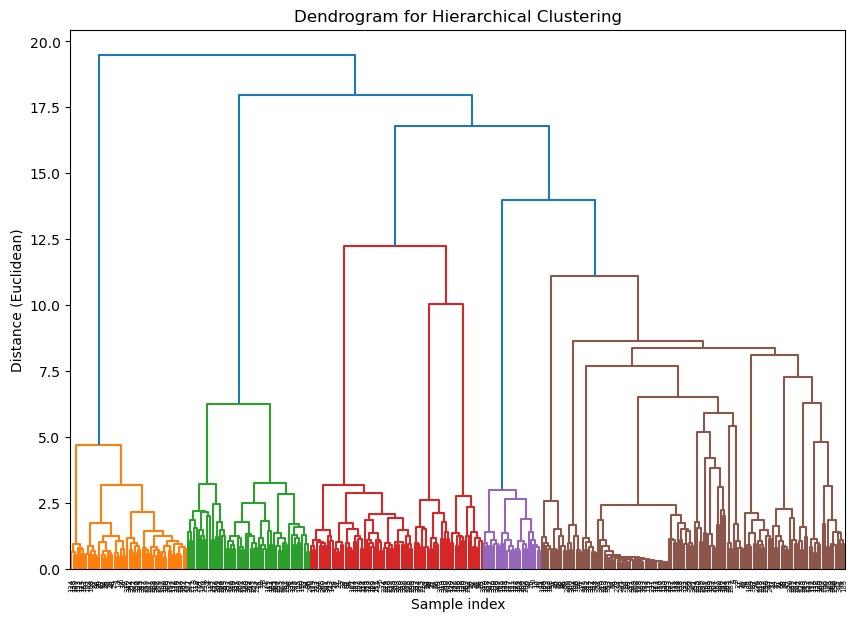

In [6]:
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel('Sample index')
plt.ylabel('Distance (Euclidean)')
plt.show()

In [7]:
distance_threshold = 5 # Adjust based on dendrogram observation

# Create cluster labels using a distance threshold
clusters = fcluster(Z, distance_threshold, criterion='distance')

In [8]:
max(clusters)

19

In [9]:
clusters

array([ 7,  1,  2,  2, 15,  4,  1,  4,  3, 15,  7, 15,  4,  7,  1,  3,  1,
       11,  3,  7, 15,  4,  1, 11,  2,  3,  7, 15,  4,  1,  7,  3, 11,  4,
        8,  5,  6, 17, 17,  1,  8,  5,  6, 11, 17,  1,  8, 17,  1,  5,  6,
        8,  1, 11, 17,  5,  6, 17,  1,  8,  5,  6,  8, 11,  5,  6, 17,  1,
        8,  5,  1, 17,  4,  3, 16, 19, 16,  1, 11, 19,  9,  4,  1, 16,  3,
        4,  3, 16,  1, 11, 19,  9, 16,  1, 11,  2,  3,  4,  4, 11,  3, 16,
        1, 19,  9, 19,  9,  4,  1, 16,  3, 11,  4,  2, 11,  1, 19,  4,  2,
        3,  6,  7, 11,  4,  1,  3,  6,  7,  4,  7,  6,  1, 19, 11,  4,  3,
        6,  7,  1, 19, 11,  4, 13, 19, 13,  7,  2,  6, 11,  1, 11,  3, 19,
        1,  4,  7,  6,  4,  6,  7, 19,  1, 11, 11,  3,  7,  8, 13,  4,  3,
        2, 11,  1,  8, 11, 11,  1,  2,  7,  4, 13,  8,  4, 11,  7, 13,  3,
        1,  8,  4,  1,  7, 13, 11,  8, 11,  1,  4, 11, 13,  7,  3,  1,  4,
        2,  2,  7, 13, 11,  1, 11,  2,  4, 11,  3,  5,  4,  1, 16, 18,  2,
        3, 16,  5,  4, 12